In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
class Ising:
    
    def __init__(self,Ngrid,J,T,nSteps):
        
        self.Ngrid=Ngrid
        self.J=J
        self.T=T
        self.nSteps=nSteps
        
        initSite=(-1)**(np.random.randint(0,2,size=(Ngrid,Ngrid))) # Set up to be random
        
        initE=self.energy(initSite)
        
        self.sites,self.engs,self.mags=self.monte_carlo_steps(initSite,initE)
    
    def energy(self,site):
        N=self.Ngrid
        return -self.J*(np.sum(site[0:N-1,:]*site[1:N,:])\
                       +np.sum(site[:,0:N-1]*site[:,1:N]))
    
    def monte_carlo_steps(self,initSite,initE):
        
        engs=[np.copy(initE)]
        sites=[np.copy(initSite)]
        mags=[np.sum(initSite)]
        E=initE
        site=initSite
        
        for step in range(self.nSteps):
        
            # Choose random site
            rand_site=np.random.randint(0,self.Ngrid,size=2)
            #print(rand_site)
            
            site[rand_site[0],rand_site[1]]*=-1
            
            newE=self.energy(site)
            
            if newE <= E or np.random.rand() < np.exp(-(newE-E)/self.T): # Accept   
                sites.append(np.copy(site))
                engs.append(np.copy(newE))
                E=np.copy(newE)
                mags.append(np.sum(site))
                
            else: # Reject
                site[rand_site[0],rand_site[1]]*=-1
                sites.append(np.copy(site))
                engs.append(np.copy(E))
                mags.append(np.sum(site))
                
        
        return sites,engs,mags
        
        
        
    

In [25]:
J=-1
T=3
nSteps=100000
Ngrid=20

isMC=Ising(Ngrid,J,T,nSteps)

<IPython.core.display.Javascript object>


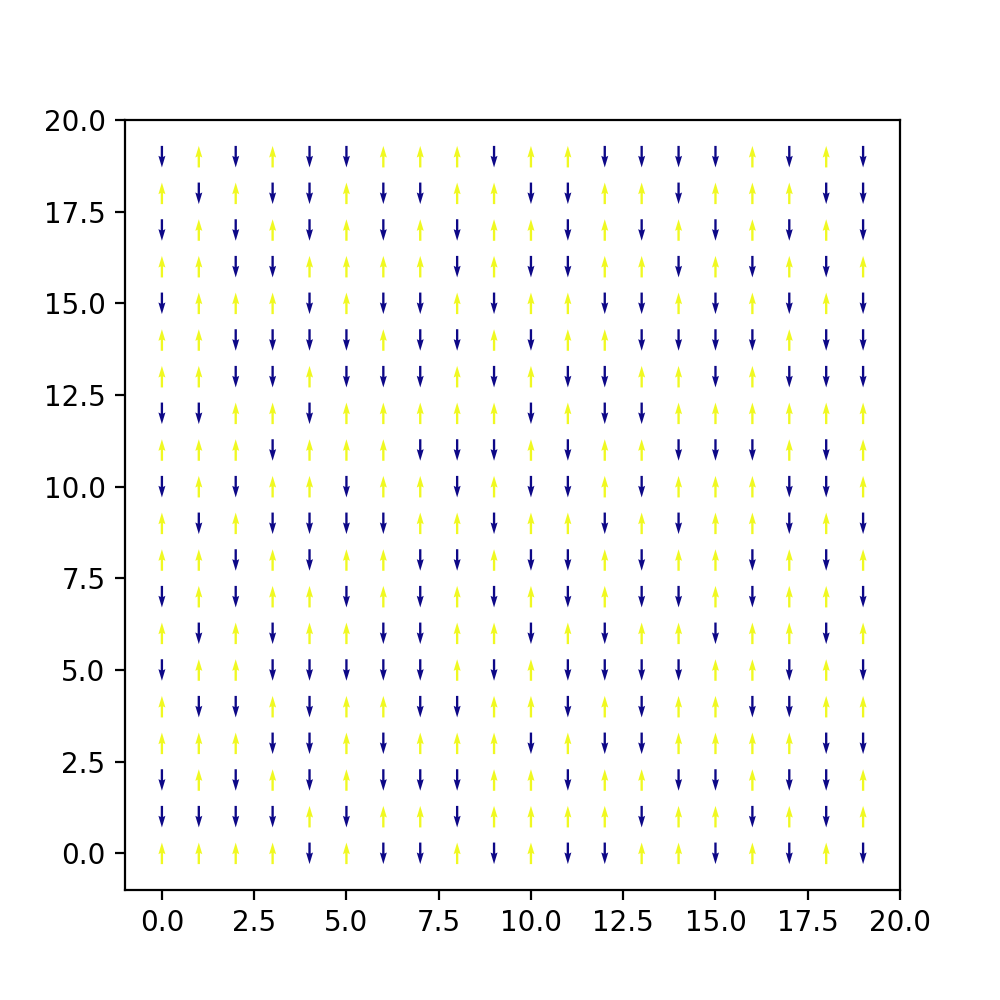

In [26]:
# Make animated plot of the sampled tours
%matplotlib notebook

fig1,ax1=plt.subplots(figsize=(5,5))

xlin=np.arange(Ngrid)
ylin=np.arange(Ngrid)
x,y=np.meshgrid(xlin,ylin)
sitesx=np.zeros((Ngrid,Ngrid))


#ax1.quiver(x,y,sitesx,isMC.sites[-1],isMC.sites[-1],pivot='mid',cmap='plasma')

line=ax1.quiver(x,y,sitesx,isMC.sites[0],isMC.sites[0],pivot='mid',cmap='plasma')
ax1.set_ylim(-1,20)
ax1.set_xlim(-1,20)

rate=500 # Print every 500th tour
def animate(i):
    ax1.clear()
    ax1.set_ylim(-1,20)
    ax1.set_xlim(-1,20)
    ax1.quiver(x,y,sitesx,isMC.sites[i*rate],isMC.sites[i*rate],pivot='mid',cmap='plasma')
    
    return line,

anim = FuncAnimation(fig1, animate, frames=int(nSteps/rate),interval=2,repeat=False,blit=True)

plt.savefig('ising.pdf',bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


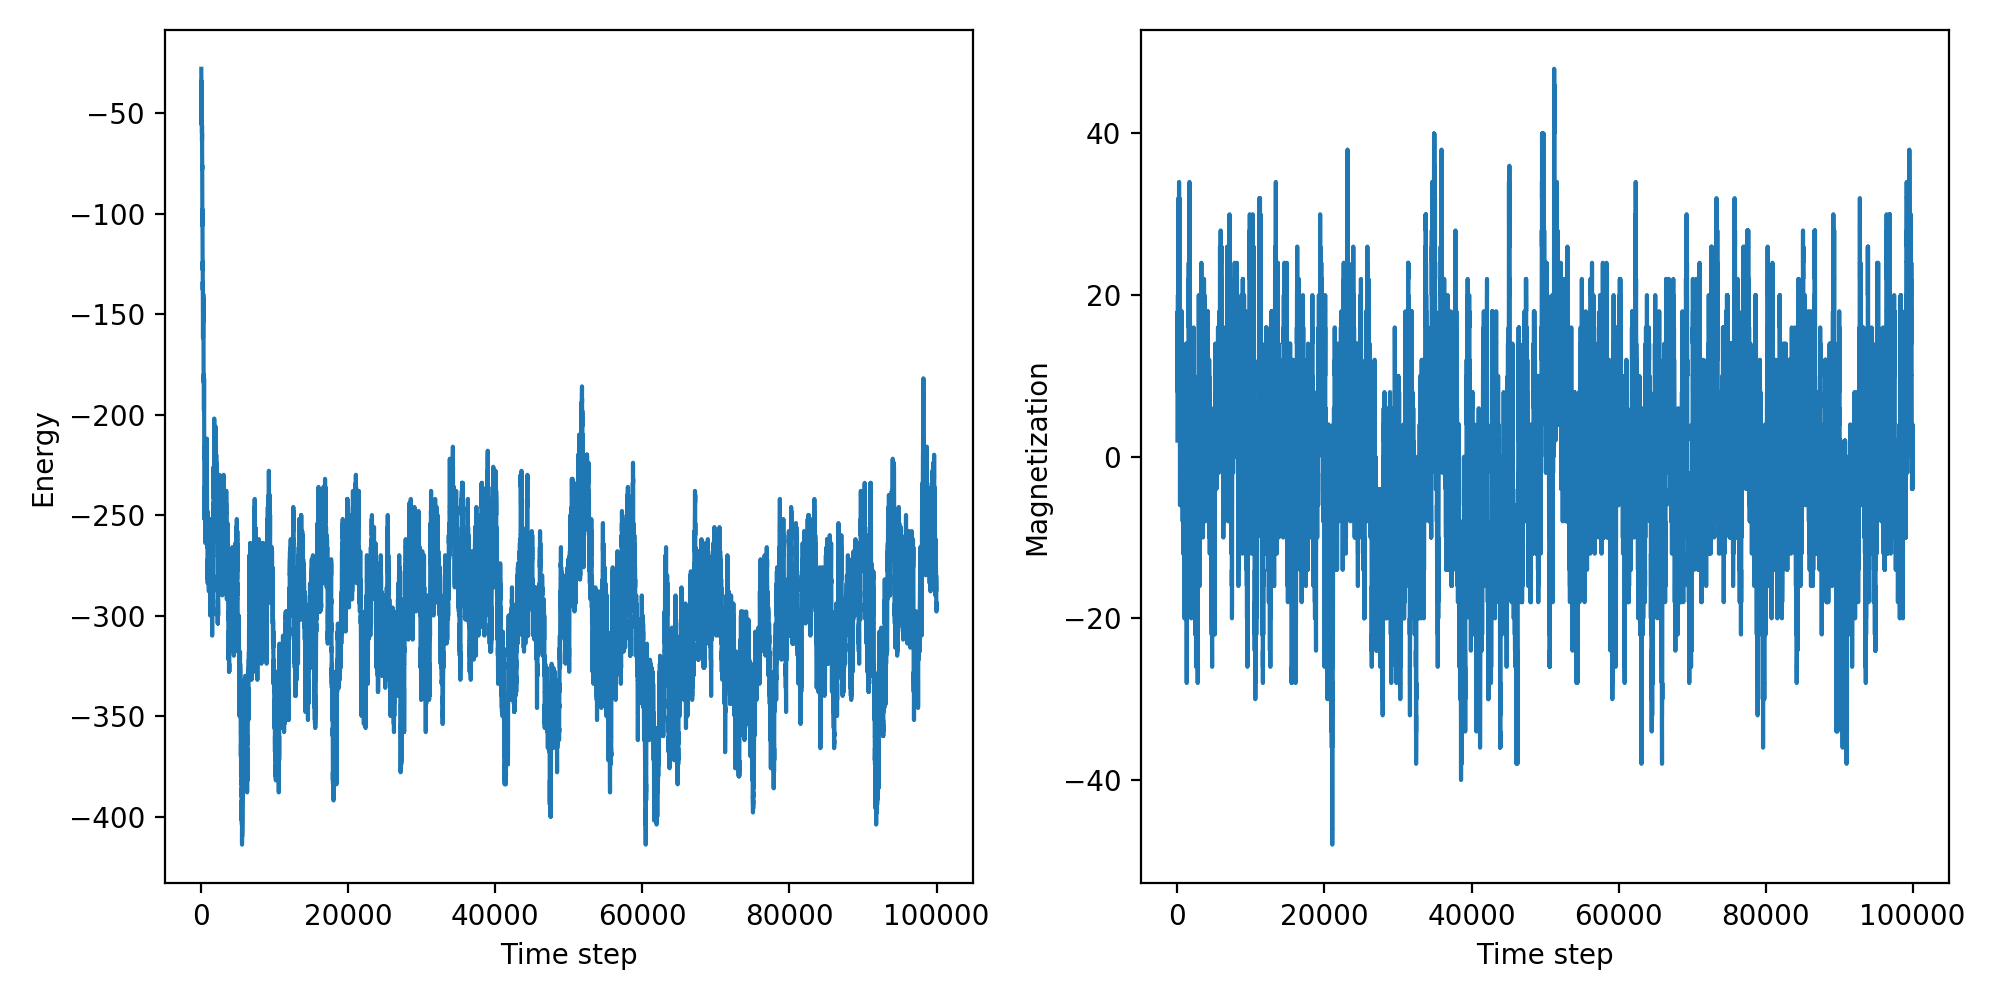

In [27]:
# Plot E and mag verus timestep
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

ax1.plot(isMC.engs)
ax1.set_ylabel('Energy')
ax1.set_xlabel('Time step')

ax2.plot(isMC.mags)
ax2.set_ylabel('Magnetization')
ax2.set_xlabel('Time step')

fig.tight_layout()

#plt.savefig('salesman_D.pdf',bbox_inches='tight')
plt.show()

In [16]:
# Lets calculate at different T

J=1
nSteps=100000
Ngrid=20

isMC_0=Ising(Ngrid,J,0.1,nSteps)
isMC_1=Ising(Ngrid,J,0.5,nSteps)
isMC_2=Ising(Ngrid,J,1,nSteps)
isMC_3=Ising(Ngrid,J,2,nSteps)
isMC_4=Ising(Ngrid,J,3,nSteps)

<IPython.core.display.Javascript object>


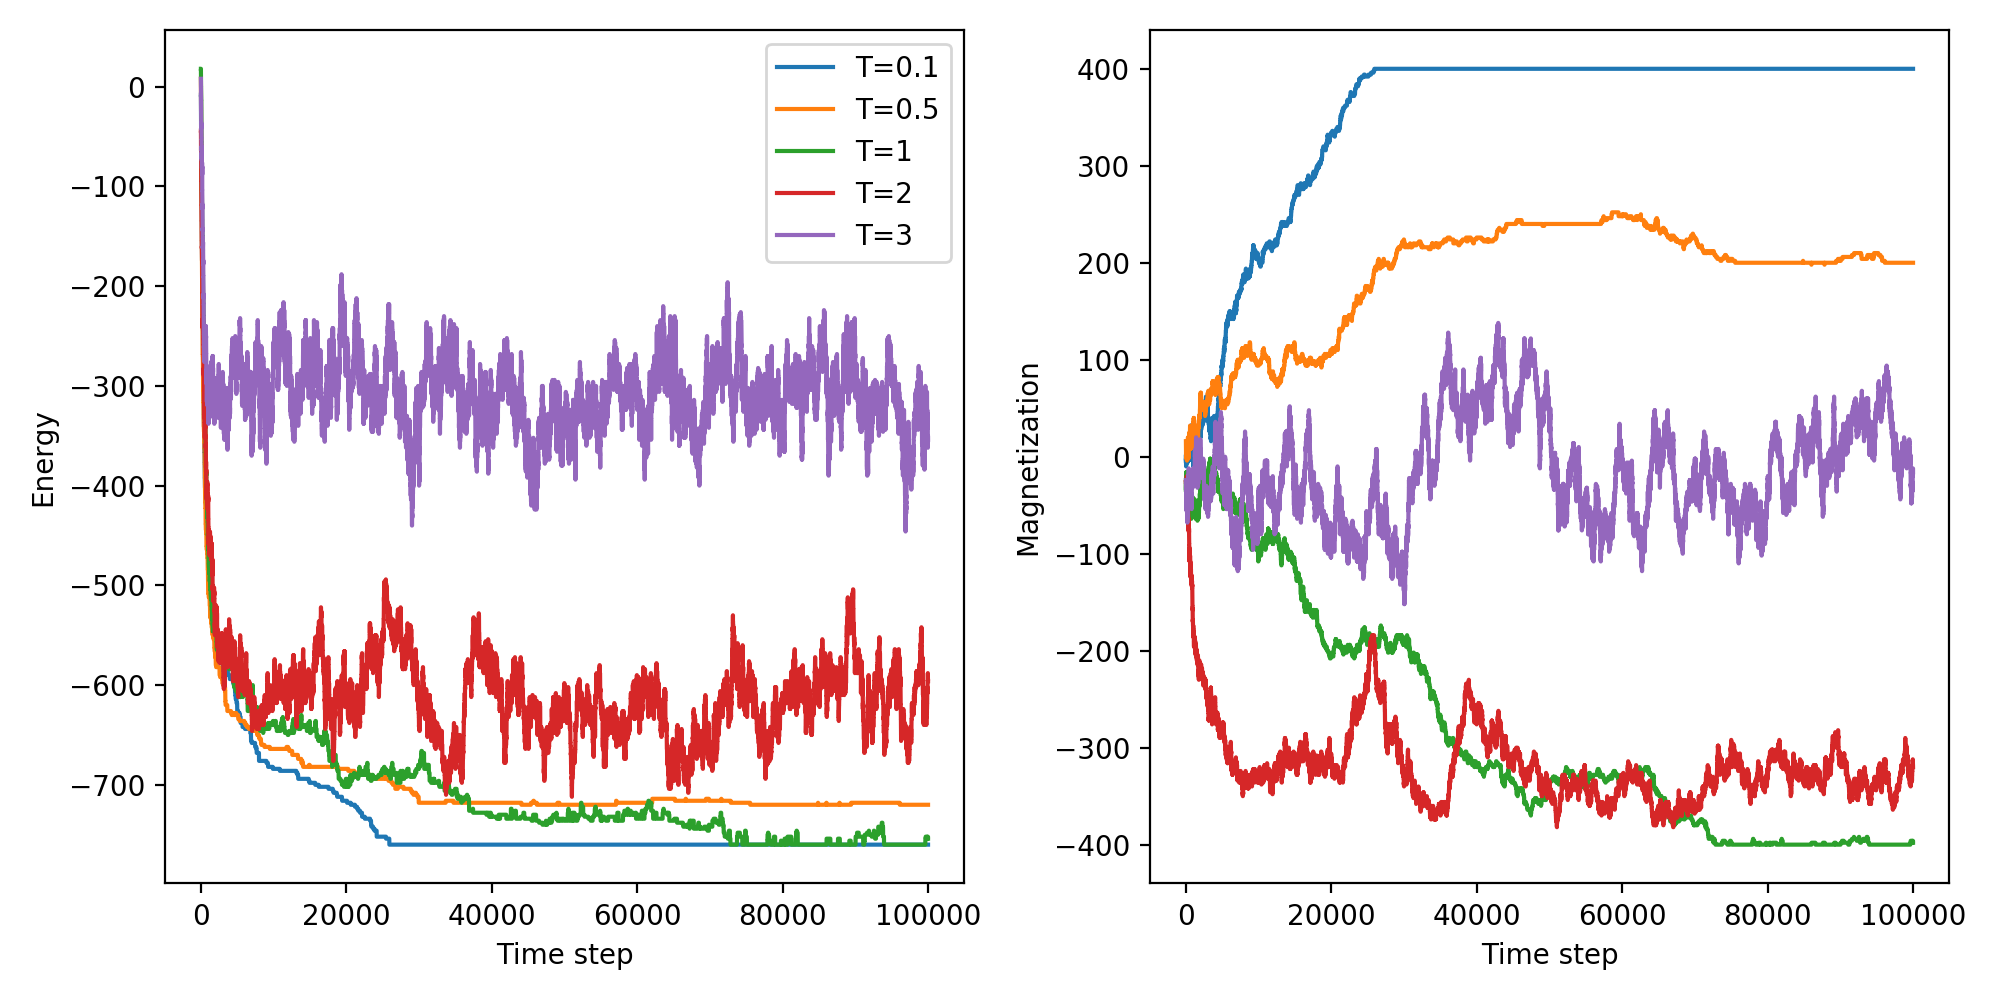

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [17]:
# Plot E and mag verus timestep
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

ax1.plot(isMC_0.engs,label='T=0.1')
ax1.plot(isMC_1.engs,label='T=0.5')
ax1.plot(isMC_2.engs,label='T=1')
ax1.plot(isMC_3.engs,label='T=2')
ax1.plot(isMC_4.engs,label='T=3')


ax1.set_ylabel('Energy')
ax1.set_xlabel('Time step')

ax2.plot(isMC_0.mags)
ax2.plot(isMC_1.mags)
ax2.plot(isMC_2.mags)
ax2.plot(isMC_3.mags)
ax2.plot(isMC_4.mags)

ax2.set_ylabel('Magnetization')
ax2.set_xlabel('Time step')
ax1.legend()

fig.tight_layout()

plt.savefig('Ising_T.pdf',bbox_inches='tight')
plt.show()